In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
#aaply anova test
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
#warning ignore
import warnings
warnings.filterwarnings('ignore')

#Load Johns Hopkins University Ionosphere database

In [2]:
columns = [f'col_{str(i)}' for i in range(1, 35)] + ['class']
df=pd.read_csv('/content/Ionosphere_database.csv',names=columns)

In [3]:
df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
#shape dataset
df.shape

(351, 35)

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   351 non-null    int64  
 1   col_2   351 non-null    int64  
 2   col_3   351 non-null    float64
 3   col_4   351 non-null    float64
 4   col_5   351 non-null    float64
 5   col_6   351 non-null    float64
 6   col_7   351 non-null    float64
 7   col_8   351 non-null    float64
 8   col_9   351 non-null    float64
 9   col_10  351 non-null    float64
 10  col_11  351 non-null    float64
 11  col_12  351 non-null    float64
 12  col_13  351 non-null    float64
 13  col_14  351 non-null    float64
 14  col_15  351 non-null    float64
 15  col_16  351 non-null    float64
 16  col_17  351 non-null    float64
 17  col_18  351 non-null    float64
 18  col_19  351 non-null    float64
 19  col_20  351 non-null    float64
 20  col_21  351 non-null    float64
 21  col_22  351 non-null    float64
 22  co

In [6]:
df['col_2'].value_counts()

,count
col_2,
0,351


In [7]:
#drop column col_2 that has no unique values
df.drop('col_2',axis=1,inplace=True)

In [8]:
# Check for missing values
df.isnull().sum().any()

False

In [9]:
#duplicated column
df.duplicated().sum()

1

In [10]:
#drop the duplicated column
df.drop_duplicates(inplace=True)

In [11]:
#shape dataset
df.shape

(350, 34)

In [12]:
#convert the class column g=1 and b=0
df['class']=df['class'].map({'g':1,'b':0})

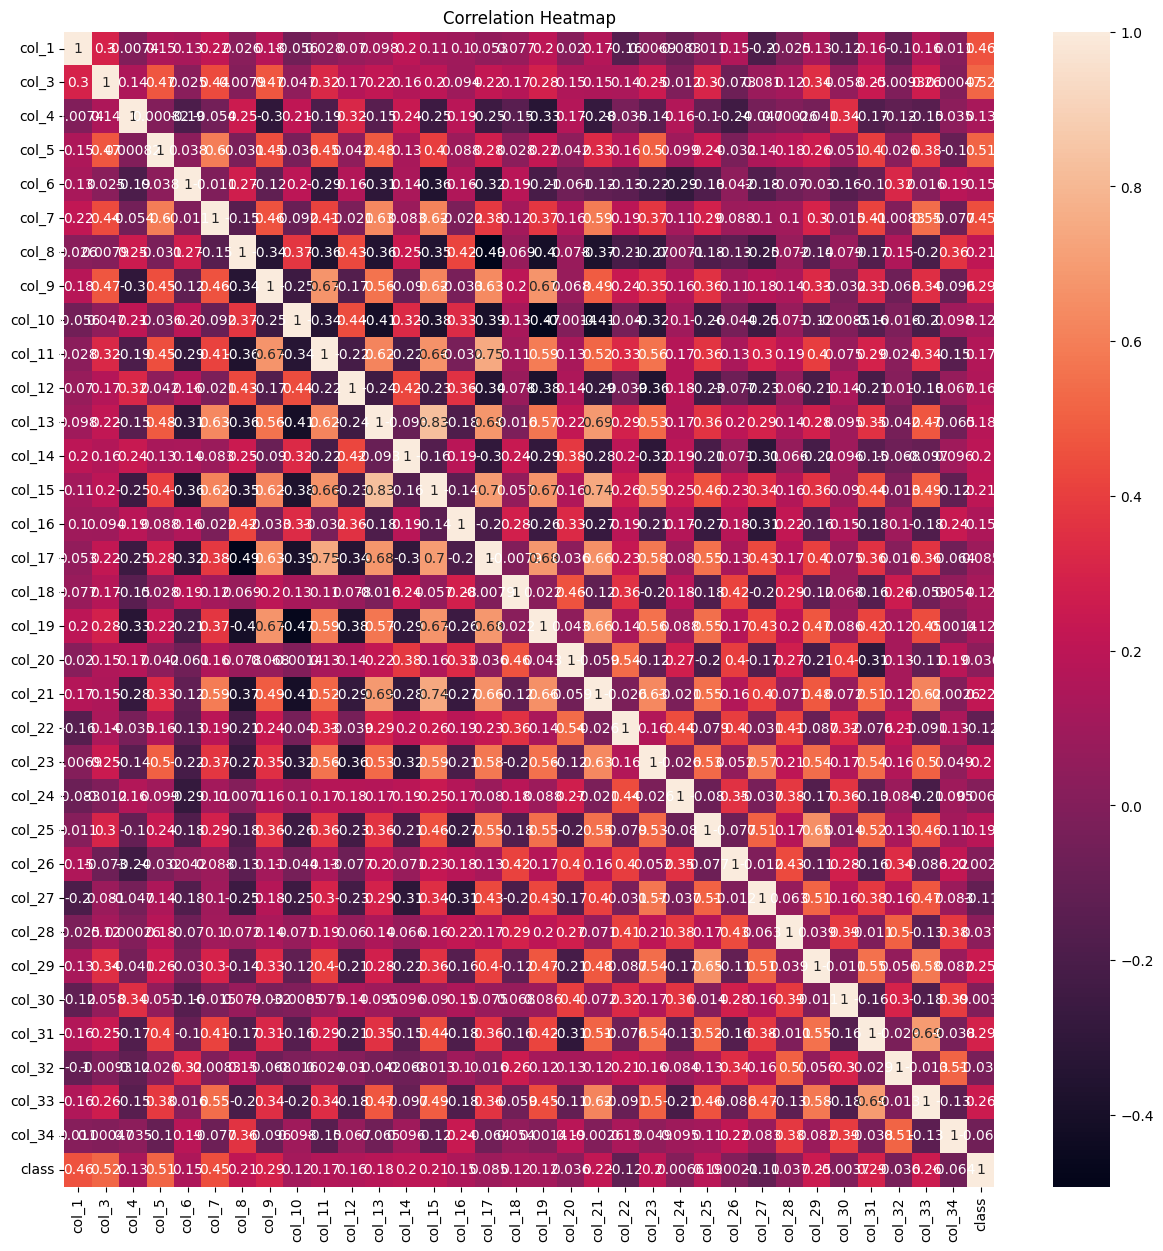

In [13]:
#correlation
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
X=df.drop('class',axis=1)
y=df['class']

In [15]:
#shape of data X
X.shape

(350, 33)

#***Feature selection***

1.***Apply VarianceThreshold:-***

In [16]:
model=VarianceThreshold(threshold=0.23)
X_vt=model.fit(X)

In [17]:
#get column pass the variance or not
X_vt.get_support()

array([False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [18]:
#get column  name from this df_vt.get_support() values =True store in columns
columns=X.columns[X_vt.get_support()]
columns

Index(['col_3', 'col_5', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11',
       'col_12', 'col_13', 'col_14', 'col_15', 'col_17', 'col_18', 'col_19',
       'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26',
       'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33'],
      dtype='object')

In [19]:
#transfom the data in variance theshold which is array format
X_vt=X_vt.transform(X)

In [20]:
#convert array dataset to   dataframe
X=pd.DataFrame(X_vt,columns=columns)

In [21]:
#check the shape of dataset
X.shape

(350, 28)

2.Principal Component Analysis (PCA)

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit(X)

In [23]:
#transform dataset
X_scaled=X_scaled.transform(X)

In [24]:
n_components = 20  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(X_scaled)

In [25]:
# Convert to DataFrame and create new column names
pca_columns = [f'PC{i+1}' for i in range(20)]  # Naming columns as PC1, PC2, ...
X = pd.DataFrame(pca_data, columns=pca_columns)

3.apply anova test

In [26]:
model=SelectKBest(score_func=f_classif,k=15)
df_av=model.fit(X,y)

In [27]:
df_av.get_support()

array([ True,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [28]:
columns=X.columns[df_av.get_support()]
columns

Index(['PC1', 'PC2', 'PC3', 'PC5', 'PC7', 'PC9', 'PC11', 'PC12', 'PC13',
       'PC14', 'PC15', 'PC17', 'PC18', 'PC19', 'PC20'],
      dtype='object')

In [29]:
#transfom the data in variance theshold which is array format
df_av=df_av.transform(X)

In [30]:
X=pd.DataFrame(df_av,columns=columns)

In [31]:
X.shape

(350, 15)

In [41]:
X.head()

,PC1,PC2,PC3,PC5,PC7,PC9,PC11,PC12,PC13,PC14,PC15,PC17,PC18,PC19,PC20
0,1.449330,-1.677354,0.015883,-0.142402,-0.296617,0.774248,-0.649307,0.378949,-0.220444,-0.247430,-0.124496,0.324652,-0.010274,-0.200728,0.025027
1,-1.316386,-1.770486,-1.684877,0.271855,-1.211736,1.046906,-1.840950,-0.540412,-1.297733,0.081969,0.414394,-0.101697,-0.299100,0.660009,0.293318
2,1.948807,-0.684504,0.772326,-0.153398,-0.029189,0.532241,-0.319543,-0.121848,-0.141798,-0.087946,-0.084104,0.212098,0.014605,0.096975,-0.172085
3,-1.119688,1.086076,-1.064796,0.826861,-0.981119,-1.522471,-2.728091,-0.123744,0.772586,-0.336511,-1.805944,-1.016891,1.579331,0.138193,1.290690
4,-0.232000,-1.292308,0.400887,0.166139,0.037519,1.151816,-0.514632,0.081915,-0.185824,0.078543,-0.547777,0.130707,-0.010993,0.282371,-0.088099


#spliting the dataset train and test

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Model Building

In [36]:
# List of models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [37]:
# Dictionary to store the results
results = {}

# Loop through models and calculate accuracy
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result
    results[model_name] = accuracy

# Find the best model
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

# Output the results
print("Model performances:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

print(f"\nBest model: {best_model_name} with accuracy {best_accuracy:.4f}")

Model performances:
Logistic Regression: 0.8571
Random Forest: 0.9429
SVM: 0.9286
KNN: 0.8571
Decision Tree: 0.9143
Gradient Boosting: 0.9429

Best model: Random Forest with accuracy 0.9429


#apply best model to train model

In [38]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9428571428571428


#save the model

In [42]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']